# Let's Grow More (LGMVIP) - "DATA SCIENCE INTERN"


## LGMVIP MAY 2023


# BEGINNER LEVEL TASK

# TASK-1- Iris Flowers Classification ML Project :

In [128]:
# Importing Libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [129]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [130]:
df.shape

(150, 6)

In [131]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [132]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [134]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [135]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Data Visualization

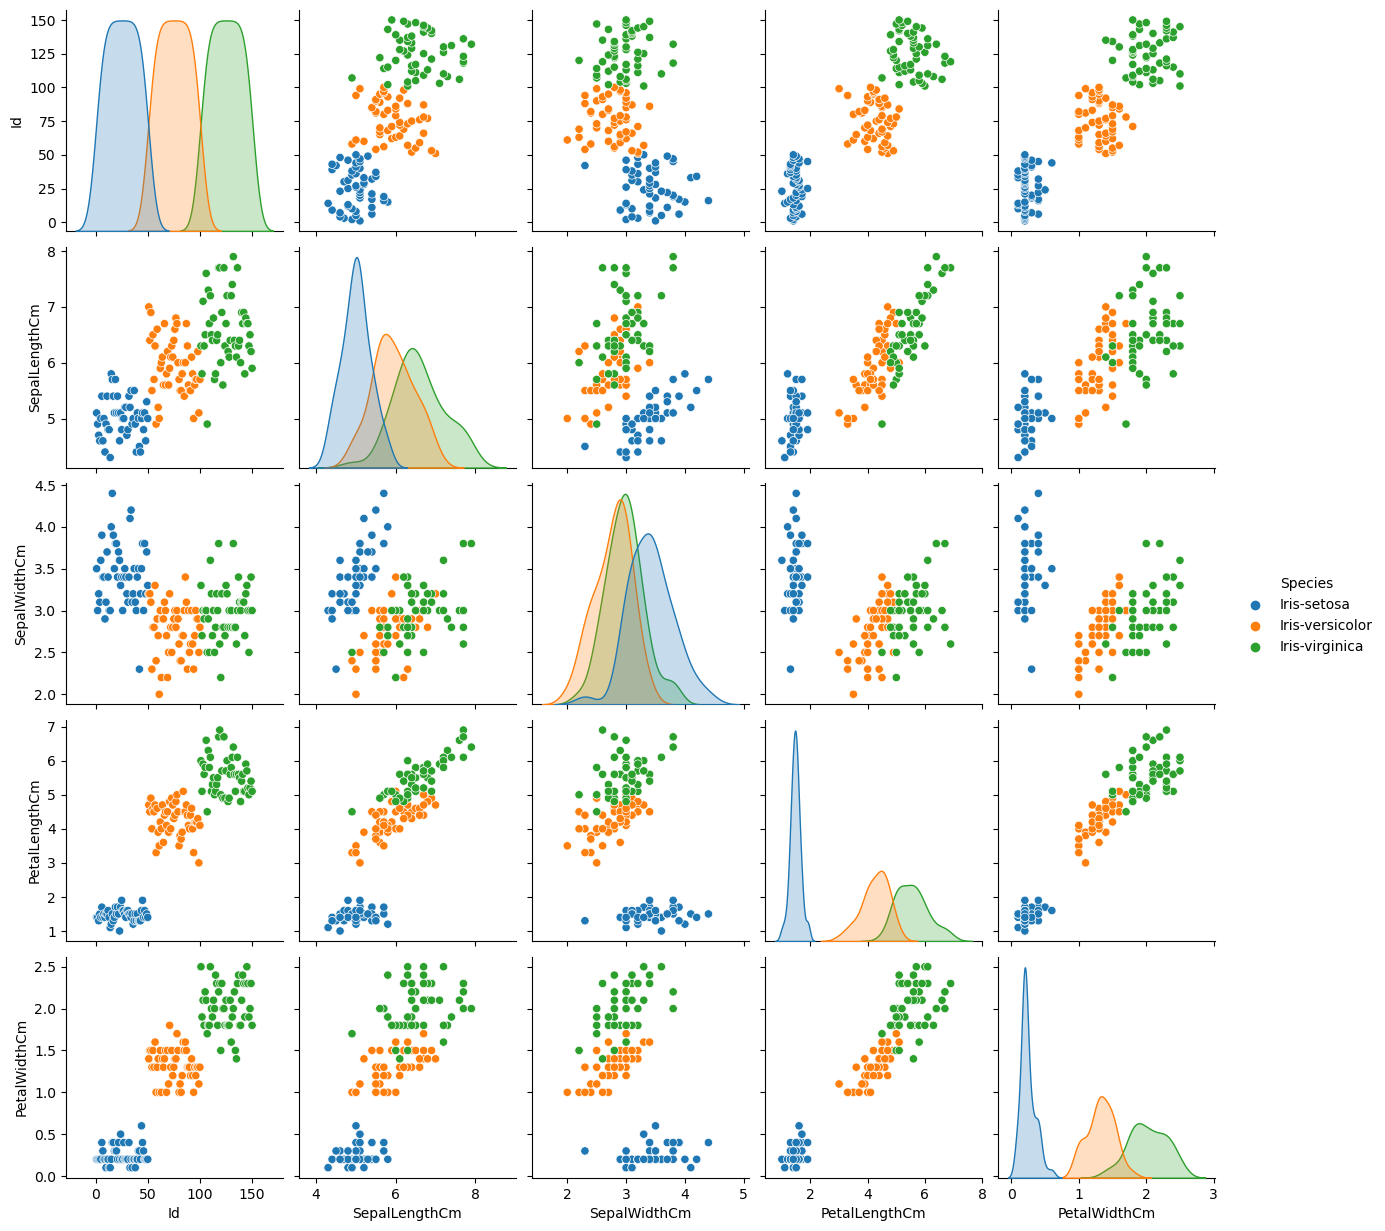

In [136]:
sns.pairplot(df,hue='Species')

### "Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset

nice visualisation and helps us understand the data by summarising a large amount of data in a single figure...

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

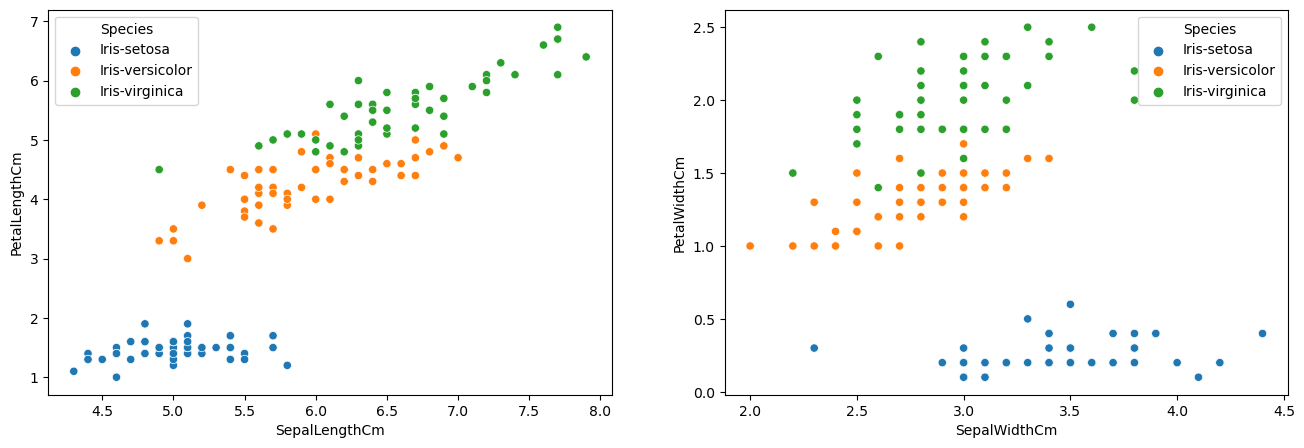

In [137]:
fig,(ax1,ax2)=plt.subplots(ncols=2 , figsize=(16,5))

sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df ,hue='Species' ,ax=ax1)
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=df,hue='Species',ax=ax2)

### Scatter plots are used to plot data points on horizontal and vertical axis in the attempt to show how much one variable is affected by another

<AxesSubplot:ylabel='PetalWidthCm'>

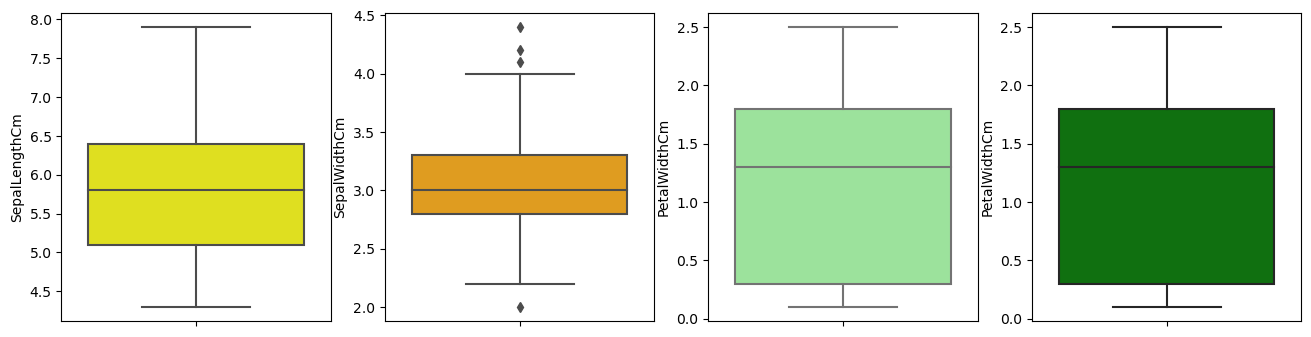

In [138]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df,y='SepalLengthCm',color='yellow')
plt.subplot(1,4,2)
sns.boxplot(data=df,y='SepalWidthCm',color='orange')
plt.subplot(1,4,3)
sns.boxplot(data=df,y='PetalWidthCm',color='lightgreen')
plt.subplot(1,4,4)
sns.boxplot(data=df,y='PetalWidthCm',color='green')

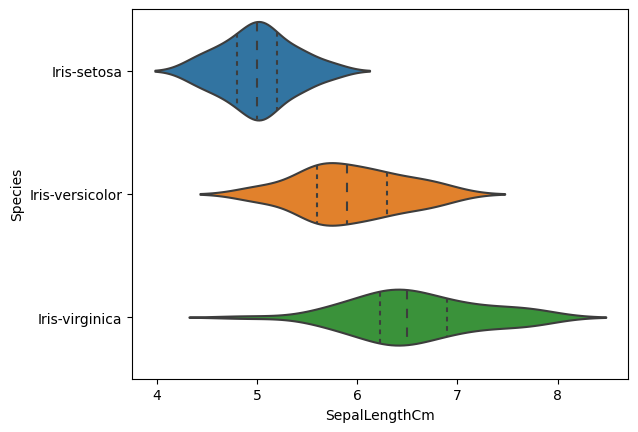

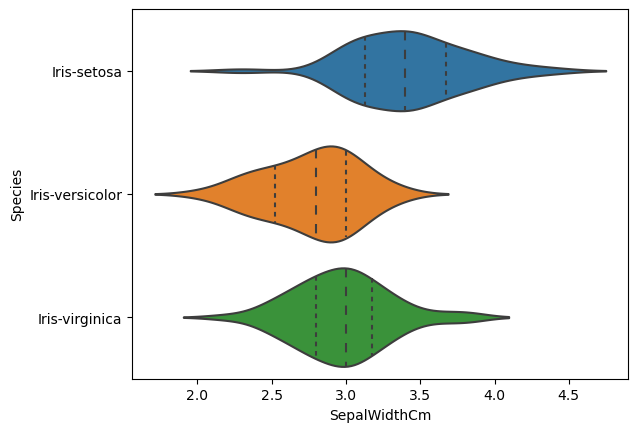

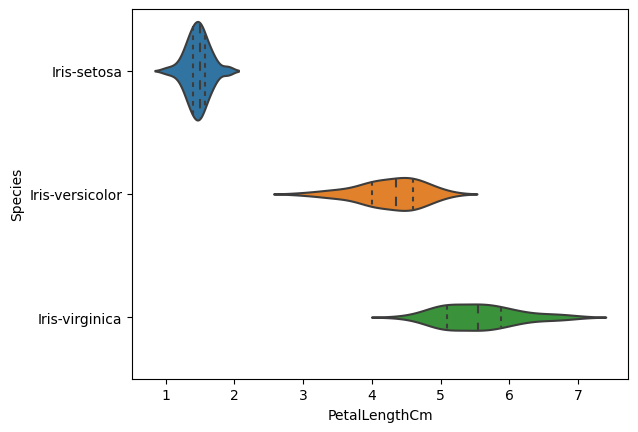

In [ ]:
sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True,cmap='inferno')
plt.show()

# Building Model , Training and Testing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### LabelEncoder Use-- when there are only two possible values of a categorical features

In [ ]:
df['Species'] = le.fit_transform = (df['Species'])
df.head(10)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train , x_test , y_train , y_test = train_test_split(X , Y ,test_size = 0.3)

# 1. Logistic Regression

In [ ]:
# Initialize a Logistic Regression

lg= LogisticRegression(max_iter=1000)

In [ ]:
lg.fit(x_train,y_train)

In [ ]:
# Predict on the test set and calculate accuracy


y_pred=lg.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [ ]:
def report(model):
    preds=model.predict(x_test)
    plot_confusion_matrix(model,x_test,y_test)

In [ ]:
print('Logistic Regression')
report(lg)
print(f'Accuracy: {round(score*100,2)}%')

# 2. Linear SVC

In [ ]:
# Initialize a Linear SVC


rbf_sv= SVC()
rbf_sv.fit(x_train,y_train)
Linear_svc=LinearSVC()

#### It can handle both classification and regression on linear and non-linear data.
     SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm

In [ ]:
Linear_svc.fit(x_train,y_train)

In [ ]:
# Predict on the test set and calculate accuracy

y_pred=Linear_svc.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [ ]:
print('Linear SVC')
report(Linear_svc)
print(f'Accuracy: {round(score*100,2)}%')

# 3. Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc=dtc.fit(x_train,y_train)

In [ ]:
# Predict on the test set and calculate accuracy

y_pred=dtc.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [ ]:
print('Decision Tree Classifier')
report(dtc)
print(f'Accuracy: {round(score*100,2)}%')

# 4. Multinomial Naive Bayes

The multinomial naïve Bayes is widely used for assigning documents to classes based on the statistical analysis of their contents.
 easy to implement as you only have to calculate probability.

In [ ]:
 Naive_Bayes = MultinomialNB()

In [ ]:
 Naive_Bayes.fit(x_train,y_train)

In [ ]:
# Predict on the test set and calculate accuracy

y_pred= Naive_Bayes.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [ ]:
print('Naive_Bayes')
report(Naive_Bayes)
print(f'Accuracy: {round(score*100,2)}%')

# 5. KNN

### The KNN algorithm can compete with the most accurate models because it makes highly accurate predictions.

Calculate the distance between test data and each row of training dataset. 

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=6)
print('KNeighborsClassifie')

In [ ]:
KNN.fit(x_train, y_train)

In [ ]:
# Predict on the test set and calculate accuracy

y_pred=KNN.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [ ]:
print('KNN')
report(KNN)
print(f'Accuracy: {round(score*100,2)}%')

# THANK YOU